In [2]:
from table_extractor import table_extractor
import pdfplumber
import numpy as np
from PIL import Image
import cv2

In [3]:
# id = "P21765896-P21355688-P21792343"
id="ES1156021-ES903925-ES1305165"
PDF_FILE = f"/OTTO-Project/EMMA_OFFICIAL_STATEMENT_TEMP_PDF/{id}.pdf"

extractor = table_extractor.TableExtractor(PDF_FILE)

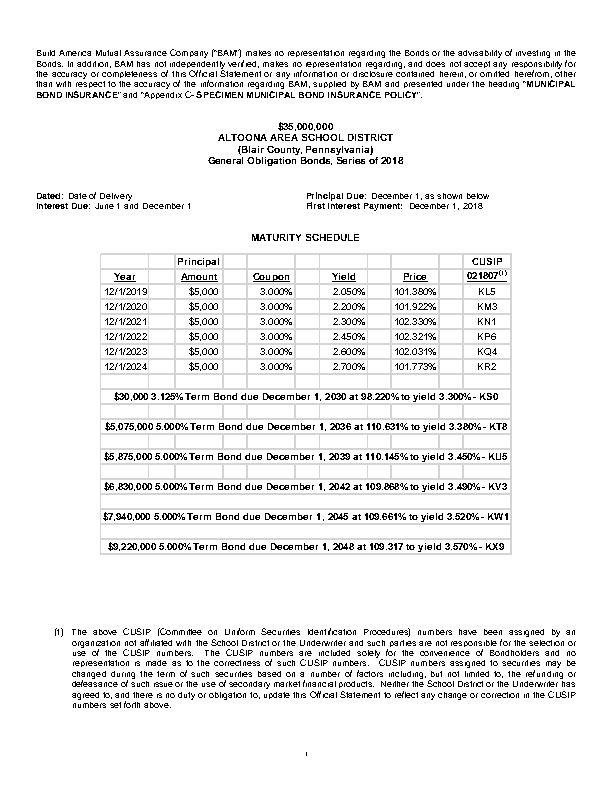

In [4]:
pdf=pdfplumber.open(PDF_FILE)
first_page=pdf.pages[1]
img=first_page.to_image()
img.show()

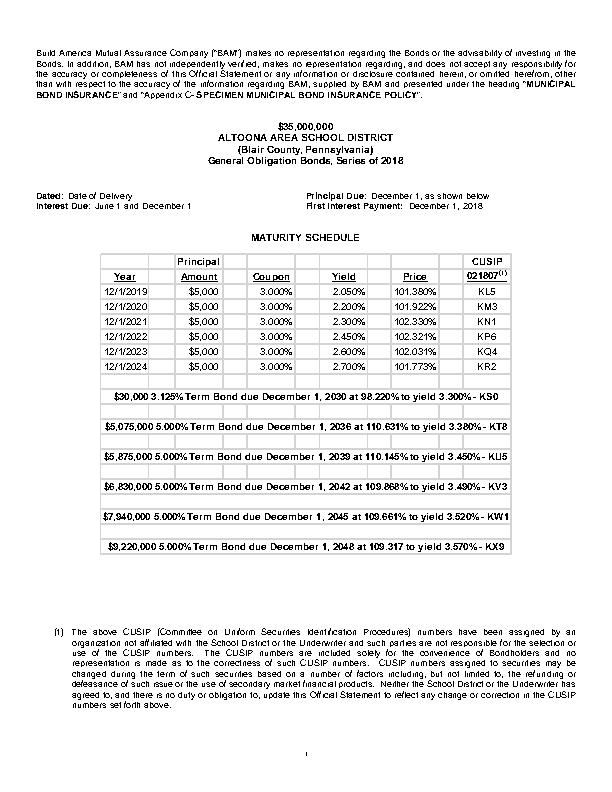

In [5]:
img_original=img.original
image=np.array(img_original)
gs_img=extractor.convert_image_to_grayscale(image)
Image.fromarray(gs_img)

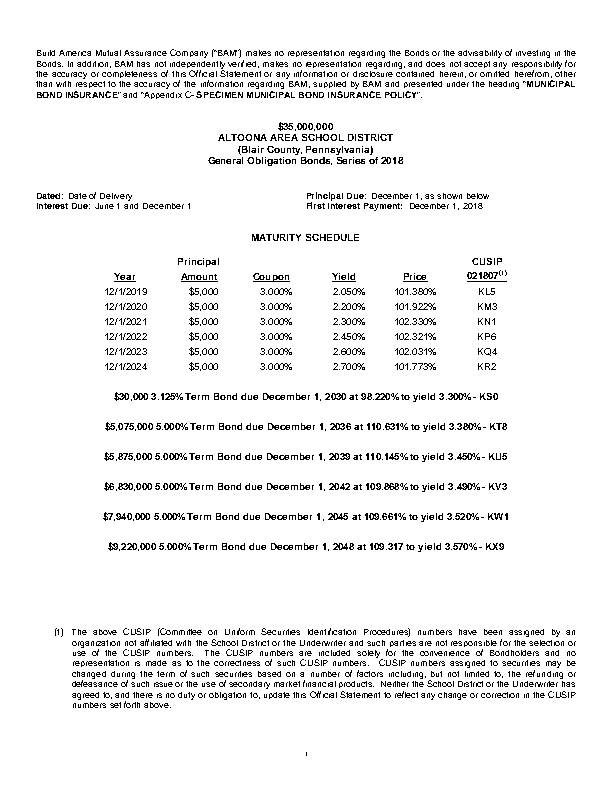

In [6]:
th_img=extractor.threshold_image (gs_img)
Image.fromarray(th_img)

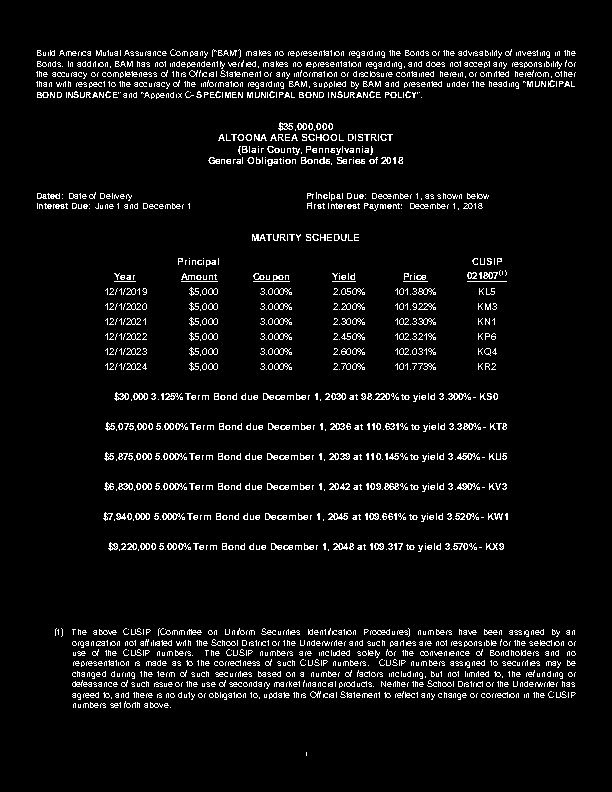

In [7]:
inv_img=extractor.invert_image (th_img)
Image.fromarray(inv_img)

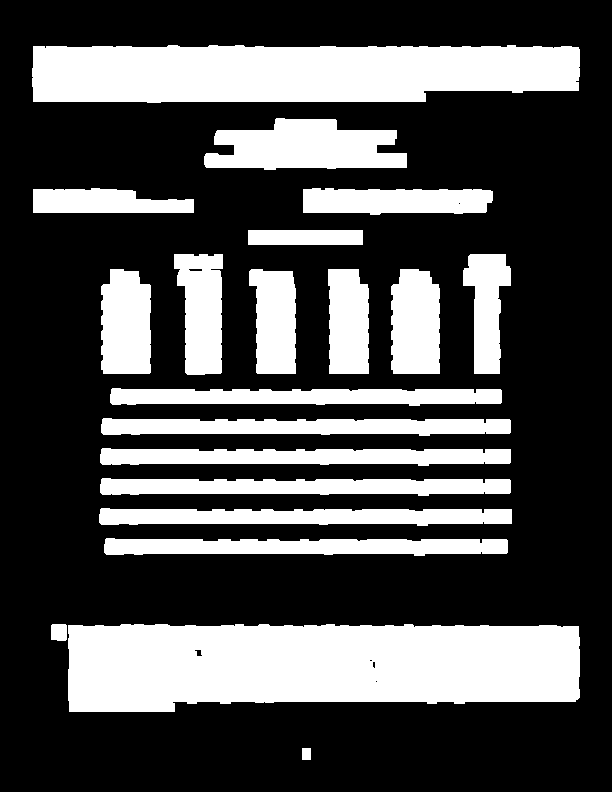

In [8]:
dil_img=extractor.dilate_image (inv_img)
Image.fromarray(dil_img)

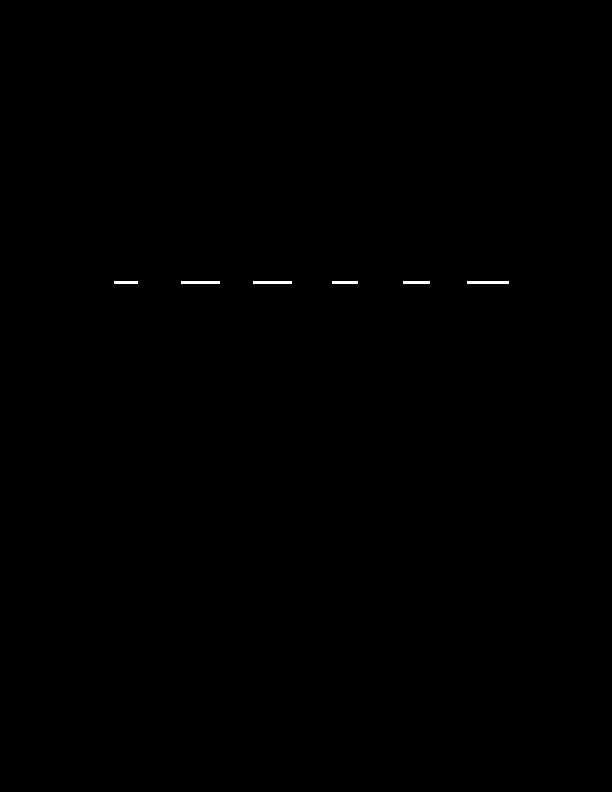

In [9]:
pg_line_img=extractor.get_lines_in_page (inv_img)
Image.fromarray(pg_line_img)

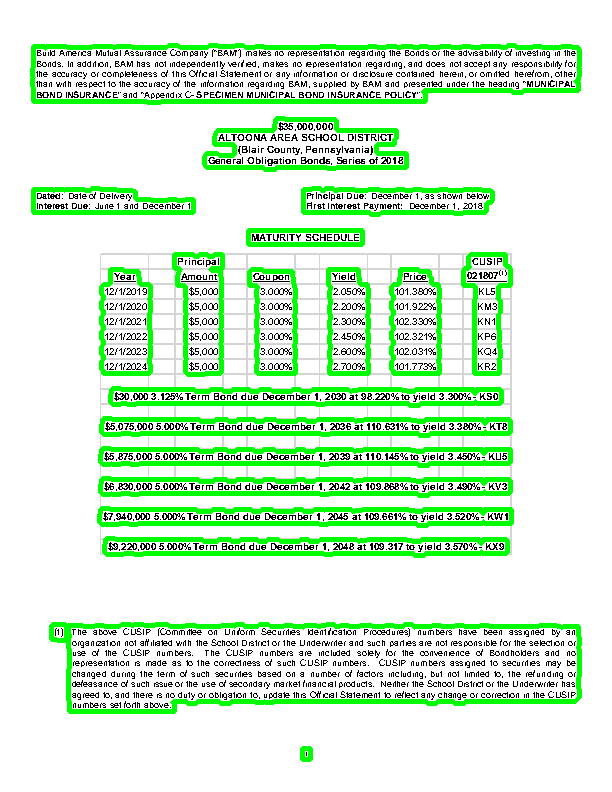

In [14]:

cont,cont_img=extractor.find_contours (dil_img,image)
Image.fromarray(cont_img)

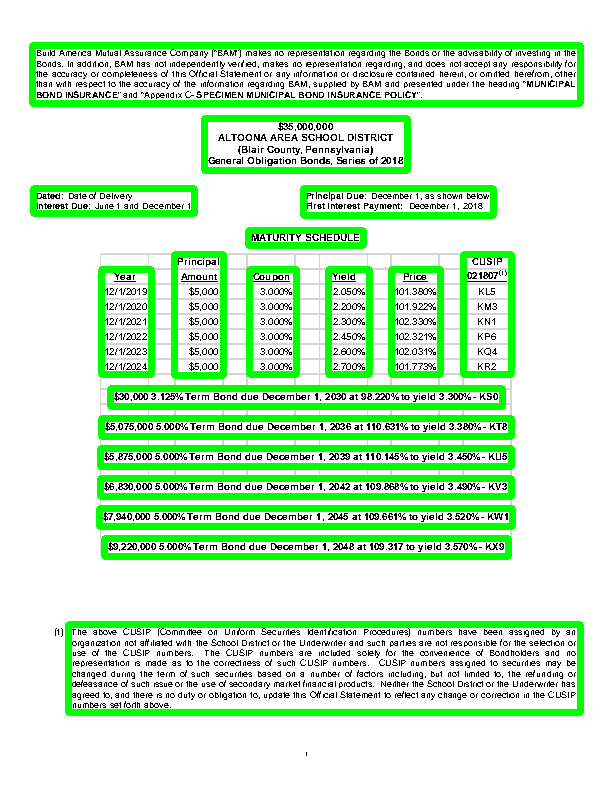

In [15]:
bbox,bbox_img=extractor.convert_contours_to_bounding_boxes (cont,image)
Image.fromarray(bbox_img)

In [20]:
a1=cv2.boundingRect(cont[0])
a1
# Image.fromarray()

(302, 748, 9, 12)

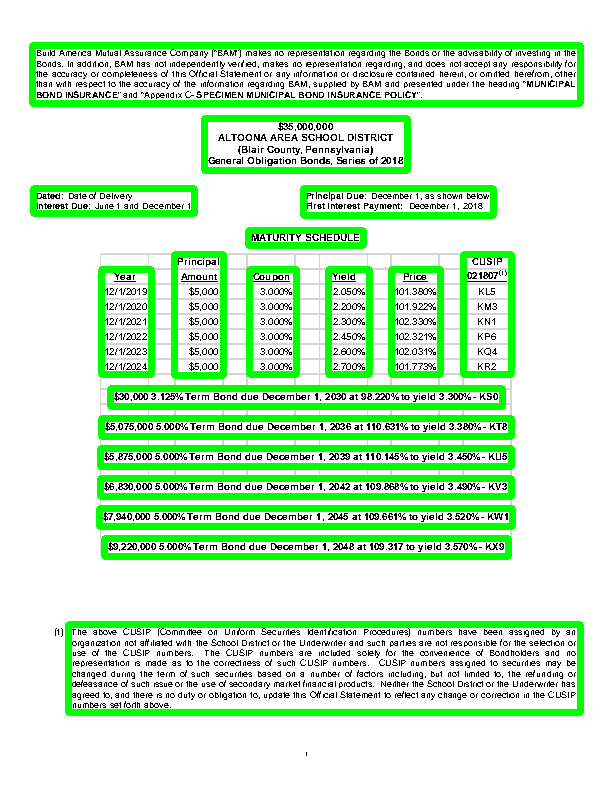

In [33]:
bbox,bbox_img=extractor.convert_contours_to_bounding_boxes (cont,image)
Image.fromarray(bbox_img)

In [34]:
bbox

[(68, 624, 512, 88),
 (104, 538, 404, 18),
 (99, 508, 413, 18),
 (100, 478, 411, 18),
 (100, 448, 411, 18),
 (101, 418, 410, 18),
 (110, 388, 392, 18),
 (391, 269, 49, 105),
 (328, 269, 41, 105),
 (249, 269, 47, 105),
 (101, 269, 50, 105),
 (463, 254, 48, 120),
 (174, 254, 49, 121),
 (248, 230, 115, 15),
 (303, 188, 190, 27),
 (33, 188, 161, 25),
 (204, 118, 203, 52),
 (32, 45, 548, 58)]

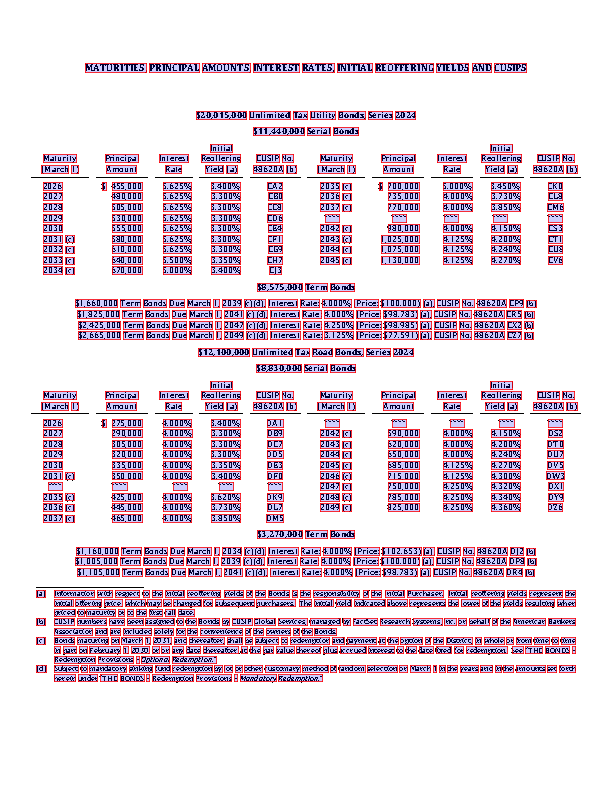

In [37]:
extracted_words=img.draw_rects(first_page.extract_words())
extracted_words